In [1]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import shapely

In [2]:
df_alagamentos = gpd.read_file("../dados/Alagamentos")
df_alagamentos[:5]

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
0,1,"R. SANTA ANASTÁSIA, 14",CAJURU,CURITIBA,Cajuru,25273/2015,SMDS,2015-12-26,2015-12-26,16:41:00,NÃO,None,None,Alagamento,POINT (679576.047 7184652.216)
1,2,"AV. ANITA GARIBALDI, 4895",BOA VISTA,CURITIBA,Boa Vista,25246/2015,URBS,2015-12-25,2015-12-25,21:28:00,NÃO,None,None,Alagamento,POINT (675048.606 7192986.695)
2,3,"R. PEDRO GUSSO, 60",NOVO MUNDO,CURITIBA,Pinheirinho,25245/2015,SMDS,2015-12-25,2015-12-25,21:25:00,NÃO,None,None,Alagamento,POINT (671325.878 7179021.716)
3,4,"R. CAPITÃO JOÃO ZALESKI, 211",PINHEIRINHO,CURITIBA,Pinheirinho,25244/2015,SMDS,2015-12-25,2015-12-25,21:19:00,NÃO,None,None,Alagamento,POINT (674257.774 7181357.034)
4,5,"R. INÁCIO WOLSKI, 612",CIDADE INDUSTRIAL,CURITIBA,CIC,25241/2015,SMDS,2015-12-25,2015-12-25,20:55:00,NÃO,None,None,Alagamento,POINT (666554.696 7172968.235)


In [3]:
len(df_alagamentos)

2155

In [4]:

df_alagamentos.DATA = df_alagamentos.DATA.astype('datetime64[ns]')



In [5]:
df_alagamentos.sort_values(["DATA"], ascending= False)

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
2106,2169,"R. SAMUEL CEZAR, 935",ÁGUA VERDE,CURITIBA,Portao,05515/2018,SMOP,2018-03-30,2018-03-30,17:15:00,NÃO,None,None,Alagamento,POINT (673003.917 7183231.728)
2107,2170,"R. CARLOS AUGUSTO CORNELSEN, 353",BOM RETIRO,CURITIBA,Matriz,05439/2018,SMDS,2018-03-29,2018-03-29,17:57:00,NÃO,None,None,Alagamento,POINT (673510.493 7189234.547)
2108,2171,"R. DAS CARMELITAS, 5076",BOQUEIRÃO,CURITIBA,Boqueirao,05438/2018,SMDS,2018-03-29,2018-03-29,17:13:00,NÃO,None,None,Alagamento,POINT (678531.960 7176673.483)
2117,2180,None,CAMPO DE SANTANA,CURITIBA,Tatuquara,06320/2018,SMDS,2018-03-27,2018-03-27,19:15:00,NÃO,None,None,Alagamento,POINT (667002.915 7168496.397)
2110,2173,"Tv. Marcos Nelsom Casagrande, 62",GANCHINHO,CURITIBA,Bairro Novo,05351/2018,SMDS,2018-03-27,2018-03-28,23:27:00,NÃO,NOME,"TV. MARCOS NELSON CASAGRANDE, 62",Alagamento,POINT (676194.458 7173043.742)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2021,"R. DOUTOR BLEY ZORNIG, 1933",BOQUEIRÃO,CURITIBA,Boqueirao,00080/2009,SMDS,2009-01-02,2009-01-02,16:51:00,NÃO,None,None,Alagamento,POINT (677719.737 7176900.704)
1959,2022,"R. Prof. Theodócio Jorge Atherino, 13",CIDADE INDUSTRIAL,CURITIBA,Boqueirao,00079/2009,SMDS,2009-01-02,2009-01-02,16:51:00,NÃO,BAIRRO,BOQUEIRÃO,Alagamento,POINT (666879.929 7181137.177)
1941,2004,"R. PINHEIRO MACHADO, 210",FAZENDINHA,CURITIBA,Portao,00097/2009,SMDS,2009-01-02,2009-01-02,16:51:00,NÃO,None,None,Alagamento,POINT (667750.543 7180146.896)
1986,2049,"R. SETEMBRINO PORTELLA NETO, 279",CIDADE INDUSTRIAL,CURITIBA,CIC,00028/2009,SMDS,2009-01-01,2009-01-01,21:45:00,NÃO,None,None,Alagamento,POINT (666287.676 7178847.344)


In [6]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')

gdf = gpd.GeoDataFrame(
    df_alagamentos)
gdf = gdf.to_crs(df_places.crs)


In [7]:
gdf['DATA'] = gdf['DATA'].dt.strftime('%d-%m-%Y')
gdf[:5]

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
0,1,"R. SANTA ANASTÁSIA, 14",CAJURU,CURITIBA,Cajuru,25273/2015,SMDS,26-12-2015,2015-12-26,16:41:00,NÃO,None,None,Alagamento,POINT (-49.21414 -25.44429)
1,2,"AV. ANITA GARIBALDI, 4895",BOA VISTA,CURITIBA,Boa Vista,25246/2015,URBS,25-12-2015,2015-12-25,21:28:00,NÃO,None,None,Alagamento,POINT (-49.26022 -25.36960)
2,3,"R. PEDRO GUSSO, 60",NOVO MUNDO,CURITIBA,Pinheirinho,25245/2015,SMDS,25-12-2015,2015-12-25,21:25:00,NÃO,None,None,Alagamento,POINT (-49.29544 -25.49609)
3,4,"R. CAPITÃO JOÃO ZALESKI, 211",PINHEIRINHO,CURITIBA,Pinheirinho,25244/2015,SMDS,25-12-2015,2015-12-25,21:19:00,NÃO,None,None,Alagamento,POINT (-49.26658 -25.47467)
4,5,"R. INÁCIO WOLSKI, 612",CIDADE INDUSTRIAL,CURITIBA,CIC,25241/2015,SMDS,25-12-2015,2015-12-25,20:55:00,NÃO,None,None,Alagamento,POINT (-49.34214 -25.55128)


In [33]:
gdf.DATA.unique()

array(['26-12-2015', '25-12-2015', '29-12-2014', '19-12-2015',
       '30-12-2009', '22-12-2014', '27-12-2009', '26-12-2009',
       '19-12-2014', '23-12-2009', '22-12-2009', '18-12-2009',
       '17-12-2009', '11-12-2014', '16-12-2009', '08-12-2014',
       '23-11-2015', '19-11-2015', '02-12-2009', '26-11-2014',
       '25-11-2014', '15-11-2015', '28-11-2009', '20-11-2014',
       '02-12-2013', '29-11-2013', '22-11-2009', '05-11-2015',
       '22-12-2010', '20-11-2009', '21-12-2010', '19-11-2009',
       '17-12-2010', '16-11-2009', '15-11-2009', '14-12-2010',
       '13-12-2010', '22-10-2015', '24-12-2011', '10-11-2009',
       '21-10-2015', '08-11-2009', '07-12-2010', '25-10-2014',
       '06-11-2009', '04-12-2010', '03-11-2013', '03-12-2010',
       '02-12-2010', '20-10-2014', '10-12-2011', '09-12-2011',
       '17-10-2014', '08-12-2011', '09-10-2015', '25-10-2013',
       '24-10-2013', '24-11-2010', '22-11-2010', '21-10-2013',
       '29-12-2012', '27-11-2011', '26-11-2011', '19-10

In [51]:
# df_places_filter = gdf[gdf.DATA == "2018-02-26"]
df_places_filter_19_jan_2018 = gdf[gdf['DATA'].str.contains("19-01-2018")]

In [52]:
df_places_filter_19_jan_2018["FLAGRANTE"].unique()

array(['NÃO'], dtype=object)

In [53]:
df_places_filter_19_jan_2018.head()

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
2094,2157,"ROD. CURITIBA - PONTA GROSSA BR-277, 3148",SANTO INÁCIO,CURITIBA,Santa Felicidade,01114/2018,SMDS,19-01-2018,2018-01-19,22:06:00,NÃO,None,None,Alagamento,POINT (-49.33368 -25.43086)
2095,2158,"R. PROFESSOR OSCAR SANCHES MONTEIRO, 124",CIDADE INDUSTRIAL,CURITIBA,CIC,01111/2018,SMDS,19-01-2018,2018-01-19,21:31:00,NÃO,None,None,Alagamento,POINT (-49.33686 -25.51022)
2096,2159,"R. VILMA CESARINI STINGLIN, 70",CIDADE INDUSTRIAL,CURITIBA,CIC,01110/2018,SMDS,19-01-2018,2018-01-19,21:28:00,NÃO,None,None,Alagamento,POINT (-49.33694 -25.49553)
2097,2160,"R. MILTON MACHADO, 139",UBERABA,CURITIBA,Cajuru,01109/2018,SMDS,19-01-2018,2018-01-19,21:26:00,NÃO,None,None,Alagamento,POINT (-49.19413 -25.48323)
2098,2161,"R. FRANCISCO LICNERSKI, 63",UBERABA,CURITIBA,Cajuru,01108/2018,SMDS,19-01-2018,2018-01-19,21:24:00,NÃO,None,None,Alagamento,POINT (-49.20209 -25.47955)


/Users/cnoboa/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


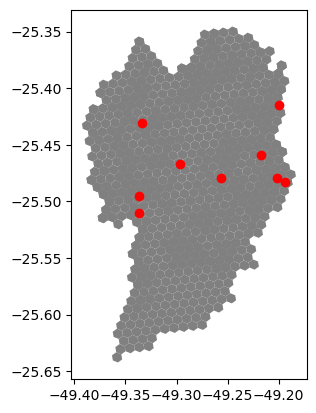

In [54]:
ax = df_places.plot(color='grey')
df_places_filter_19_jan_2018.plot(ax=ax,color='red', column="FLAGRANTE")

plt.show()

In [61]:
merged_gdf = gpd.sjoin(gdf, df_places, how='right', op='intersects')

/Users/cnoboa/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [62]:
merged_gdf.head()

,index_left,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,date,score,hex,NOME,geometry
0,323.0,328.0,"R. FRANCISCO JOSÉ LOBO, 379",SÍTIO CERCADO,CURITIBA,Bairro Novo,21544/2009,SMDS,15-11-2009,2009-11-15,21:06:00,NÃO,None,None,Alagamento,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5..."
0,507.0,521.0,"R. LEONARDO ABAGGIO, 326",SÍTIO CERCADO,CURITIBA,Bairro Novo,18217/2012,SMDS,02-12-2012,2012-12-02,19:55:00,NÃO,None,None,Alagamento,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5..."
0,1523.0,1579.0,"R. DOS PIONEIROS, 1",TATUQUARA,CURITIBA,Tatuquara,02256/2011,SMDS,30-01-2011,2011-01-30,15:33:00,NÃO,None,None,Alagamento,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5..."
0,1864.0,1926.0,"R. MARIA DA LUZ ROQUEMBAUER, 1028",SÍTIO CERCADO,CURITIBA,Bairro Novo,00365/2011,SMDS,06-01-2011,2011-01-06,23:02:00,NÃO,None,None,Alagamento,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5..."
1,146.0,148.0,"R. CIDADE DE XAXIM, 333",SÍTIO CERCADO,CURITIBA,Bairro Novo,22908/2014,SMDS,25-11-2014,2014-11-25,20:08:00,NÃO,None,None,Alagamento,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5..."


In [63]:
merged_gdf['NATUREZA'].fillna('Nenhum', inplace=True)
merged_gdf["NATUREZA"].unique()

array(['Alagamento', 'Nenhum'], dtype=object)

<AxesSubplot: >

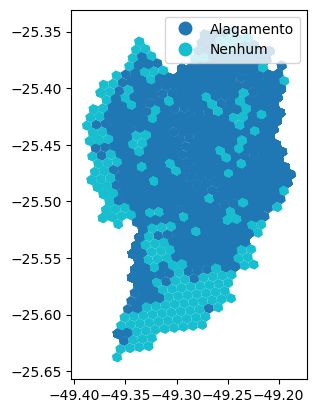

In [64]:
merged_gdf.plot(column="NATUREZA", legend=True)

In [65]:
len(merged_gdf)

3544

In [66]:
merged_gdf.to_csv("../dados/alagamentos.csv")